In [565]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [566]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [567]:
df.shape  #Check number of rows,column

(15, 2)

In [568]:
df.head()  

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [569]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [570]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


### Outlier detecction using IQR :

In [571]:
iqr = df["Ground Temperature"].quantile(0.75) - df["Ground Temperature"].quantile(0.25)
upper_threshold = df["Ground Temperature"].quantile(0.75) + (1.5 * iqr)
lower_threshold = df["Ground Temperature"].quantile(0.25) - (1.5 * iqr)
print(lower_threshold,upper_threshold)

58.400000000000006 98.4


In [572]:
iqr = df["Chirps/Second"].quantile(0.75) - df["Chirps/Second"].quantile(0.25)
upper_threshold = df["Chirps/Second"].quantile(0.75) + (1.5 * iqr)
lower_threshold = df["Chirps/Second"].quantile(0.25) - (1.5 * iqr)
print(lower_threshold,upper_threshold)

12.9 19.699999999999996


###### Conclusion:No outlier,all data points fall within the threshold values

### checking for null values :

In [573]:
df.isnull().sum() 

Chirps/Second         0
Ground Temperature    0
dtype: int64

###### Conclusion:No Null values

In [574]:
df = df.drop_duplicates()  #drop duplicates
df.shape

(15, 2)

# EDA

### Histogram

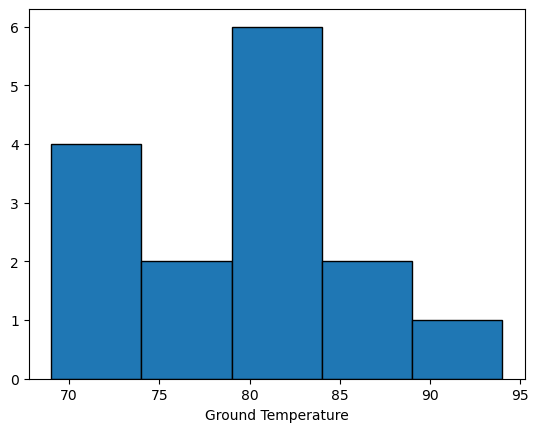

In [575]:
import matplotlib.pyplot as plt
#df["Ground Temperature"].plot(kind="hist",title="Tempearture Distribution",bins=5);
plt.hist(df["Ground Temperature"],edgecolor='black', bins=[69,74,79,84,89,94])
plt.xlabel("Ground Temperature");

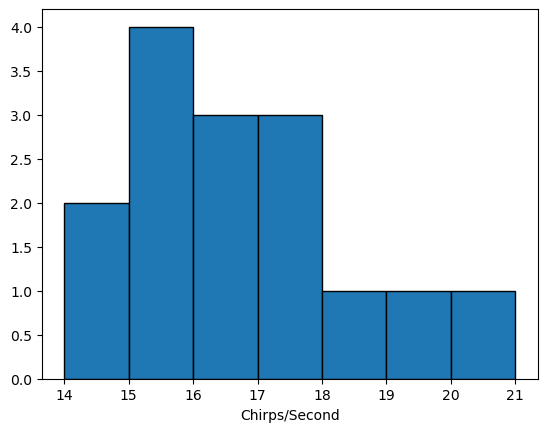

In [576]:
#df["Chirps/Second"].plot(kind="hist",title="Distribution of Chirps/Second",bins=6);
plt.hist(df["Chirps/Second"],edgecolor='black',bins=[14,15,16,17,18,19,20,21])
plt.xlabel("Chirps/Second");

### Scatter plot

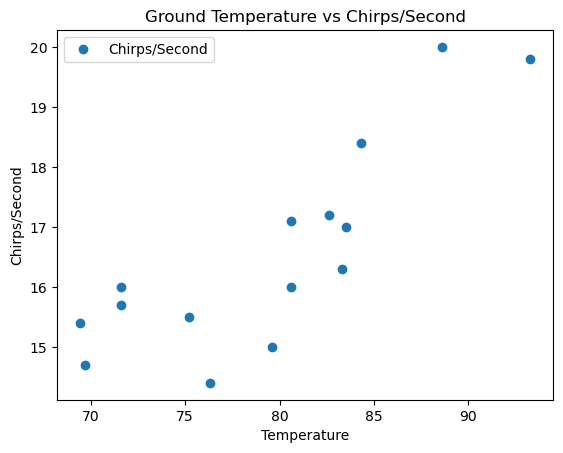

In [577]:
df.plot(x='Ground Temperature', y='Chirps/Second',style='o',xlabel="Temperature",ylabel="Chirps/Second",title="Ground Temperature vs Chirps/Second");

By the above plot , we can say that there is linear relationship between 'Ground Temperature' and 'Chirps/Second'

In [578]:
df.corr()  #checking for coreelation

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


correlation value '0.83' indicates there is strong positive correlation exist between 'Chirps/second' and 'Ground Temperature' 

Here first we consider 'Ground Temperature' as feature and 'Chirps/Second' as target

### Train Test Split

In [579]:
X = df[['Ground Temperature']].values 
y = df['Chirps/Second'].values 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [580]:
X_train.shape,X_test.shape

((10, 1), (5, 1))

### Modelling

In [581]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [582]:
y_pred=regressor.predict(X_test)

In [583]:
nw=pd.DataFrame({"Real":y_test,"Predicted":y_pred})
nw

,Real,Predicted
0,18.4,17.325976
1,19.8,19.080872
2,15.4,14.420649
3,17.0,17.169985
4,17.1,16.604519


###### Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [584]:
a=regressor.predict([[95]])
print("if tempertaure reaches 95 then rate of chirping is ",a.item())

if tempertaure reaches 95 then rate of chirping is  19.41235179262852


In [585]:
coef=pd.DataFrame(regressor.coef_,["Ground Temperature"],["Coefficients"])
coef

,Coefficients
Ground Temperature,0.194988


In [586]:
print("Intercept is",regressor.intercept_)

Intercept is 0.8884535890176881


#### Linear Regression equation(y=mx+c) for this model

Predicted Chirps/sec = (0.194988*Ground Temperature)+(0.8884535890176881)

### Metrics

In [587]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test) # another way to get the r^2 values

R2- SCORE: 0.7338527195344469


0.7338527195344469

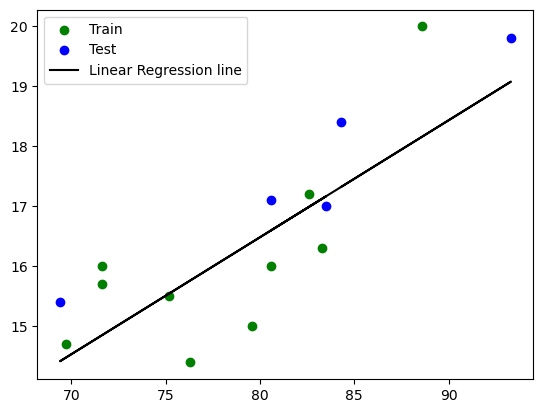

In [588]:
plt.scatter(X_train, y_train,color='g') 
plt.scatter(X_test, y_test,color='b')
plt.plot(X_test, y_pred,color='k') 
plt.legend(["Train","Test","Linear Regression line"])
plt.show()

Now we consider 'Chirps/Second' as feature and 'Ground Temperature' as target

### Train Test Split

In [589]:
X = df[['Chirps/Second']].values 
y = df['Ground Temperature'].values 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [590]:
X_train.shape,X_test.shape

((10, 1), (5, 1))

### Modelling

In [591]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [592]:
y_pred=regressor.predict(X_test)

In [593]:
nw=pd.DataFrame({"Real":y_test,"Predicted":y_pred})
nw

,Real,Predicted
0,93.3,88.982213
1,71.6,76.570229
2,80.6,77.478423
3,69.7,73.542915
4,76.3,72.634721


###### Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [594]:
a=regressor.predict([[18]])
print("if crcicket chirping at rate of 18 chirps/second then temperature is",a.item())

if crcicket chirping at rate of 18 chirps/second then temperature is 83.53304902007761


In [595]:
coef=pd.DataFrame(regressor.coef_,["Chirps/Second"],["Coefficients"])
coef

,Coefficients
Chirps/Second,3.027313


In [596]:
print("Intercept is",regressor.intercept_)

Intercept is 29.041410704873265


### Metrics

In [597]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test)

R2- SCORE: 0.7697995993798672


0.7697995993798672

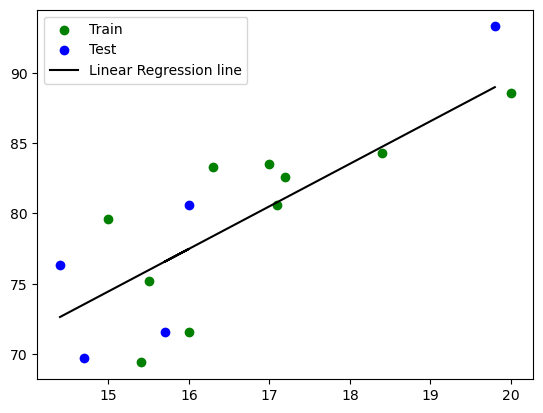

In [598]:
plt.scatter(X_train, y_train,color='g') 
plt.scatter(X_test, y_test,color='b')
plt.plot(X_test, y_pred,color='k') 
plt.legend(["Train","Test","Linear Regression line"])
plt.show()

#### Linear Regression equation(y=mx+c) for this model

Predicted Ground Temperature = (3.027313*Chirps/sec)+(29.041410704873265)